# Assignment 1

<font size="4">**A1 Part 1: Visualizing patterns in the data**</font>

We will recreate the plots from Week 2, Part 2, where we will use the 'focuscrimes' data. 

We will begin by doing the subexercise:

- First create the week-day plots, the months, the 24-hour cycle, and the 168 hours of the week as barcharts (Week 2, Part 2).

We will describe and comment on the plots.

The cell below loads the data.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import calplot
from urllib.request import urlopen
import json
import plotly.express as px
import geopandas as gpd
from shapely.geometry import Point
from geopandas import GeoDataFrame
from IPython.display import set_matplotlib_formats
warnings.filterwarnings("ignore")

plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['font.sans-serif'] = "Helvetica"
set_matplotlib_formats('retina', quality=100)

data = pd.read_csv("/Users/Gustav/Downloads/Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv")

data["Date"] = pd.to_datetime(data["Date"], format="%m/%d/%Y")
data["Year"] = data["Date"].dt.year
data = data[data["Year"] < 2018]

focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

The plot below shows the number of crimes per week-day by category.

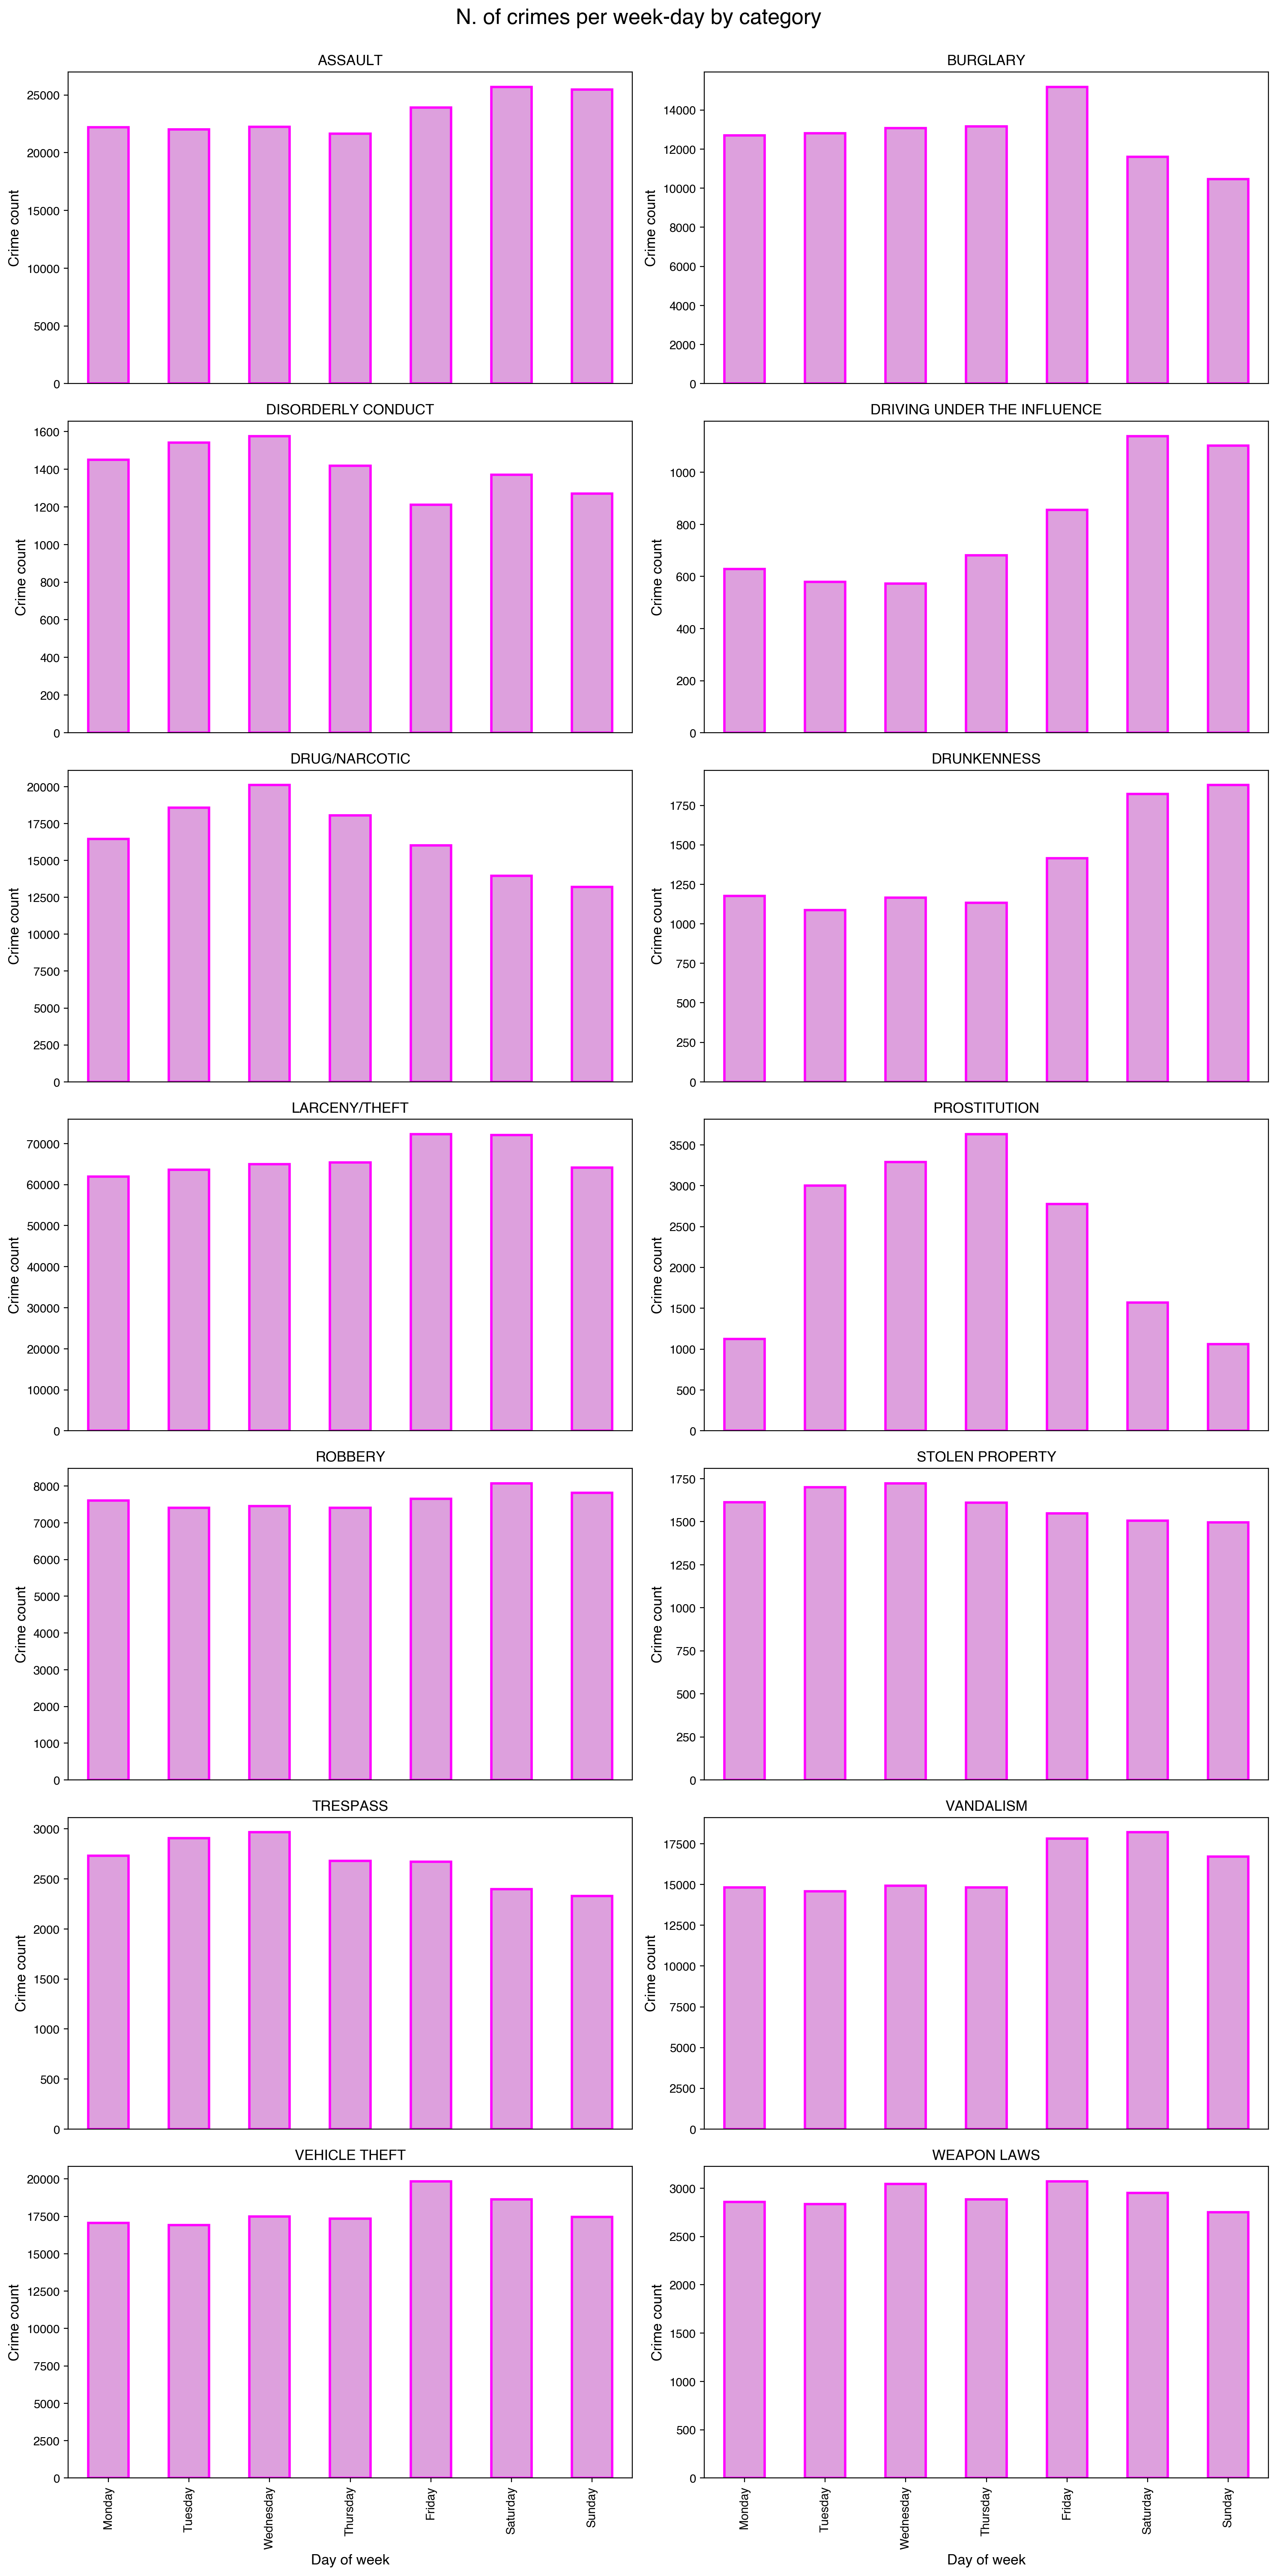

In [12]:
focus_data = data[data["Category"].isin(focuscrimes)]
grouped = focus_data.groupby(['Category', 'DayOfWeek']).size().reset_index(name='counts')
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
grouped['DayOfWeek'] = pd.Categorical(grouped['DayOfWeek'], categories=day_order, ordered=True)
grouped = grouped.sort_values(by='DayOfWeek')

fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(15, 30))
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.08, top=0.95, wspace=0.3, hspace=0.5)

fig.suptitle("N. of crimes per week-day by category", fontsize=18, y=1)

for i, (name, group) in enumerate(grouped.groupby('Category')):
    row, col = i // 2, i % 2
    group.plot(x='DayOfWeek', y='counts', kind='bar', ax=axes[row, col], color='plum', edgecolor='fuchsia', linewidth=2 , legend=False)

    axes[row, col].set_xlabel("")
    axes[row, col].set_ylabel("Crime count", fontsize=12)
    axes[row, col].set_title(name)
    
    if row == axes.shape[0] - 1:
        axes[row, col].set_xlabel("Day of week", fontsize=12)
    else:
        axes[row, col].set_xticks([])

plt.tight_layout()
plt.show()

During this plot we do see some behavioural patterns that are typical. We see that the crime 'DRUNKENNESS' is largest during the weekend, which is quite typical since those are the days where people get off work. An observation that seems to stick out as well, is the fact that 'PROSTITUTION' is very high during the mid-week days and not so much during the weekends. The theory here may be because many sex-workers get hired by men who are married. A hypothesis could then be that a lot of married men spend time on the weekend with the family, however during the work-days of the week, they sneak off and cheat.

Below shows the bar plots according to the months.

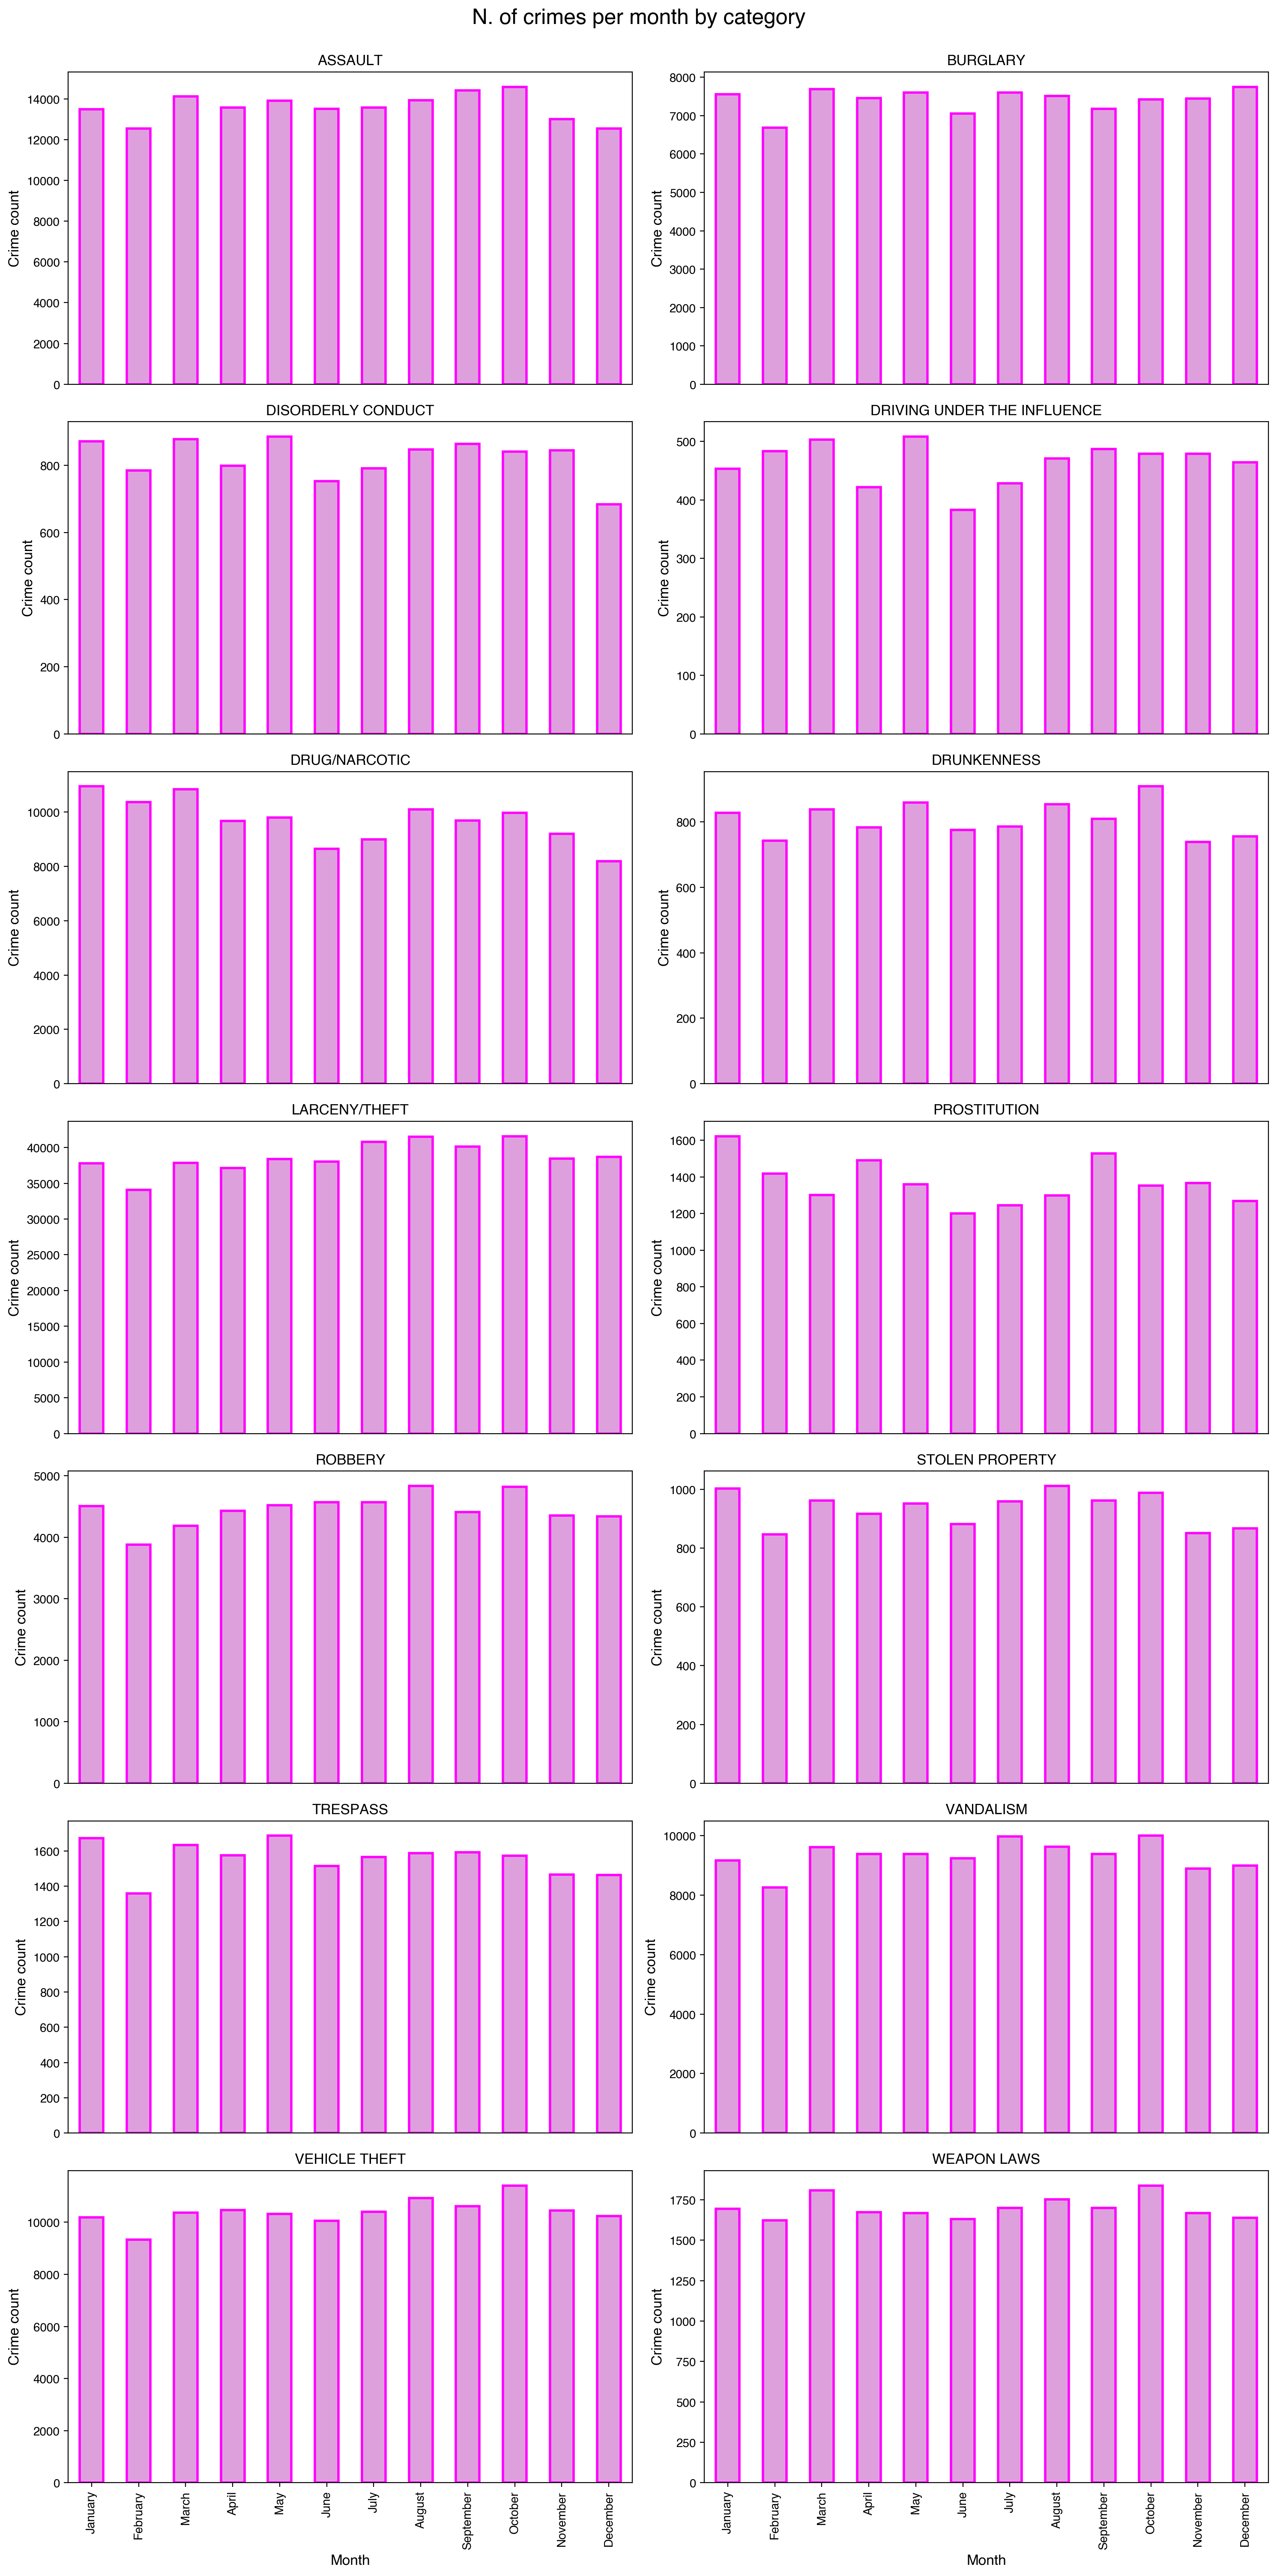

In [13]:
focus_data['Date'] = pd.to_datetime(focus_data['Date'], format='%m/%d/%Y')
focus_data['Month'] = focus_data['Date'].dt.month_name()
grouped = focus_data.groupby(['Category', 'Month']).size().reset_index(name='counts')
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

grouped['Month'] = pd.Categorical(grouped['Month'], categories=month_order, ordered=True)
grouped = grouped.sort_values(by='Month')

fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(15, 30))
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.08, top=0.95, wspace=0.3, hspace=0.5)

fig.suptitle("N. of crimes per month by category", fontsize=18, y=1)

for i, (name, group) in enumerate(grouped.groupby('Category')):
    row, col = i // 2, i % 2
    group.plot(x='Month', y='counts', kind='bar', ax=axes[row, col], color='plum', edgecolor='fuchsia', linewidth=2 , legend=False)

    axes[row, col].set_xlabel("")
    axes[row, col].set_ylabel("Crime count", fontsize=12)
    axes[row, col].set_title(name)
    
    if row == axes.shape[0] - 1:
        axes[row, col].set_xlabel("Month", fontsize=12)
    else:
        axes[row, col].set_xticks([])

plt.tight_layout()
plt.show()

One thing to notice here in the month-plots is the fact that the month of February seems to be the lowest for the majority of the crimes. This is likely due to the fact that February is indeed the smallest month with only 28 days (29 if Leap Year). We can also see that 'DRIVING UNDER THE INFLUENCE' is low during the summer. This may be because of summer vacation season. During the summer, many people travel and go on vacation, therefore drunk driving may be reduced due to the fact that people aren't home driving their own cars. 'DRUGS/NARCOTICS' also have lower crimes during holidays (summer, christmas). Maybe people feel happier during this time and don't need as many drugs.

Below shows the bar plots according to the 24-hour cycle.

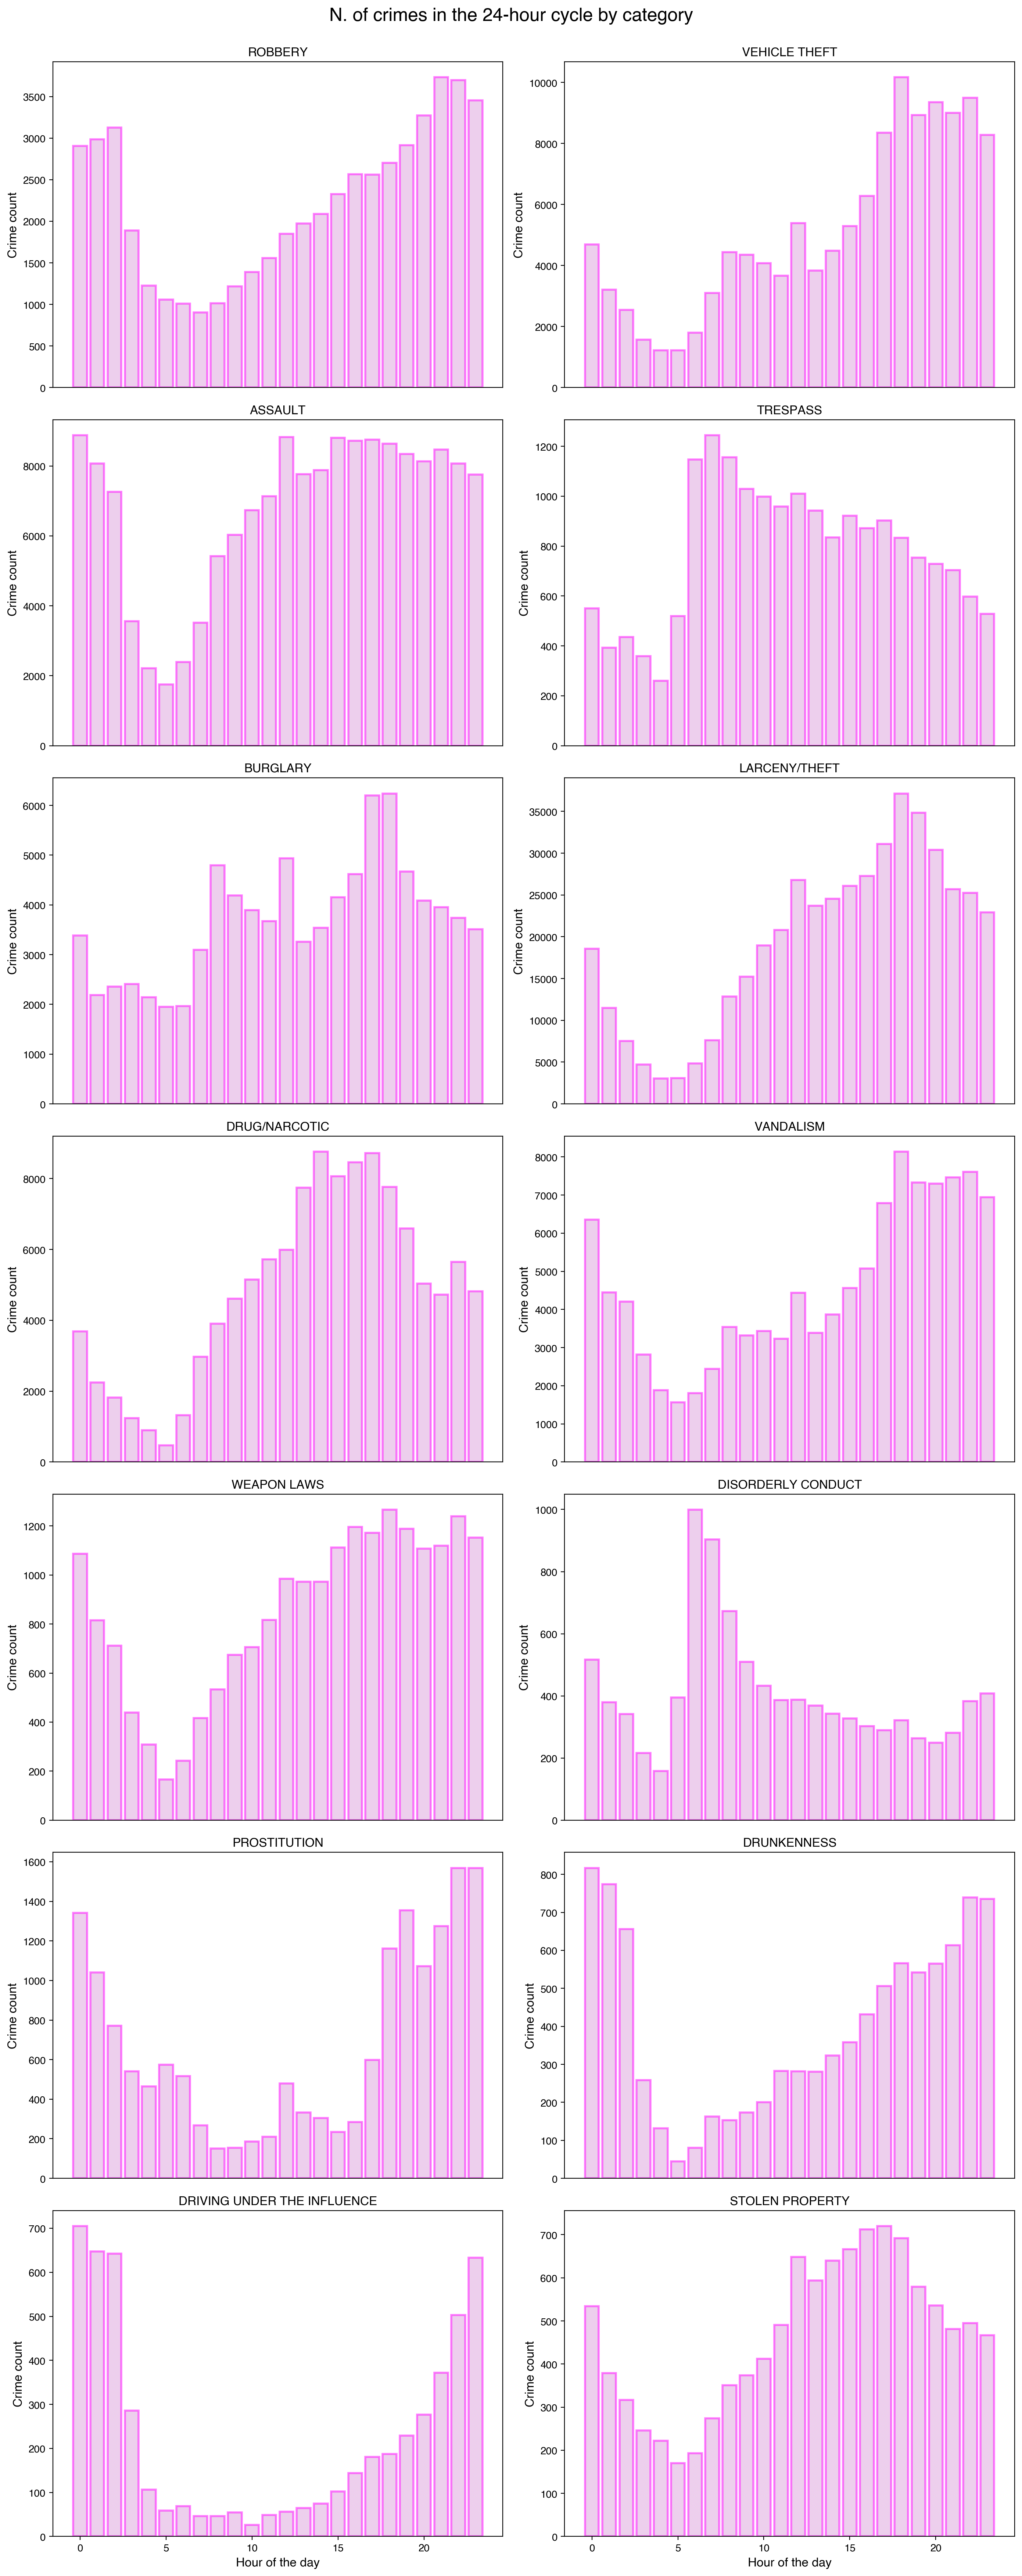

In [14]:
focus_data["HourOfDay"] = pd.to_datetime(focus_data["Time"], format="%H:%M").dt.hour

categories = focus_data["Category"].unique()

num_categories = len(categories)
num_rows = (num_categories + 1) // 2

fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(14, num_rows * 5))

fig.suptitle("N. of crimes in the 24-hour cycle by category", fontsize=18, y=1)

for i, category in enumerate(categories):
    row = i // 2
    col = i % 2
    hour_of_day = focus_data[focus_data["Category"] == category]["HourOfDay"]
    axes[row, col].bar(hour_of_day.value_counts().index, hour_of_day.value_counts().values, alpha=0.5, color='plum', edgecolor='fuchsia', linewidth=2)
    axes[row, col].set_title(category)
    axes[row, col].set_ylabel("Crime count", fontsize=12)
    
    if row == axes.shape[0] - 1:
        axes[row, col].set_xlabel("Hour of the day", fontsize=12)
    else:
        axes[row, col].set_xticks([])

plt.tight_layout()
plt.show()

Many of these crimes' 24-hour cycle make sense. One can see that 'DRUNKENNESS' is very low during the morning/day, and then as soon as it gets to the evening, then the crimes regarding drinking rise, since people drink at night. The majority of crimes in general are committed during the night, which is expected. 'TRESPASS' and 'DISORDERLY CONDUCT' are crimes which are committed all the time. Therefore they also have high peaks during the day. A reason for this could be that these are not considered as severe as the other crimes, and calls regarding these two crimes are not prioritized after office hours when most of the crimes are at its highest.

Below show the bar plots according to the 168-hour cycle of the week.

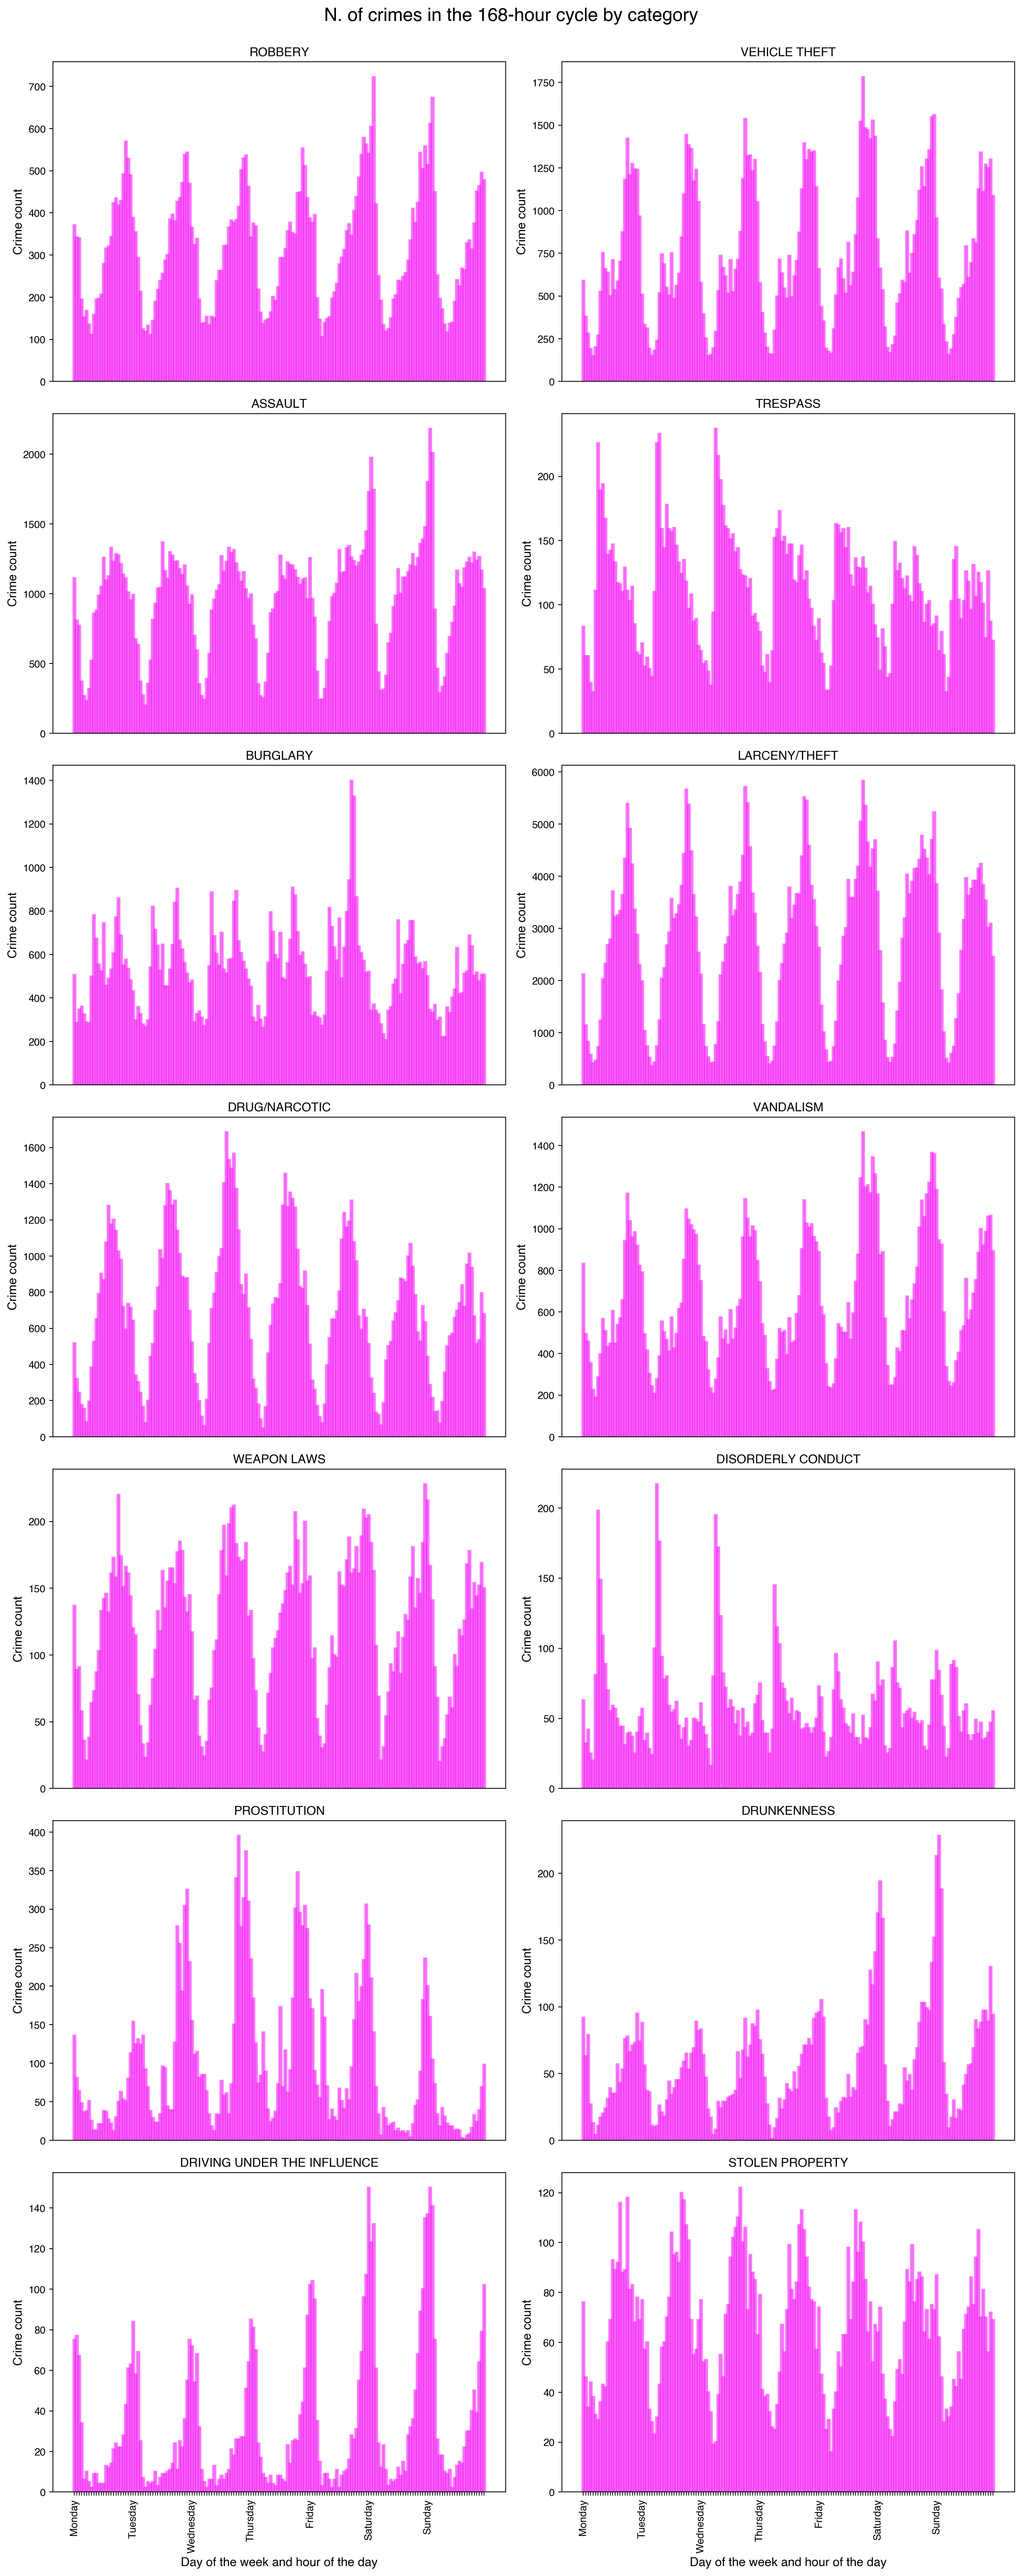

In [15]:
focus_data["DayOfWeek"] = pd.to_datetime(focus_data["Date"]).dt.dayofweek * 24
focus_data["HourOfDay"] = pd.to_datetime(focus_data["Time"], format="%H:%M").dt.hour

categories = focus_data["Category"].unique()

num_categories = len(categories)
num_rows = (num_categories + 1) // 2

fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(14, num_rows * 5))

fig.suptitle("N. of crimes in the 168-hour cycle by category", fontsize=18, y=1)

ordered_days = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

xticks = [*range(168)]
day_start = []
for day in ordered_days:
    day_start.append(day)
    day_start += [None]*23
xticklabels = day_start

for i, category in enumerate(categories):
    row = i // 2
    col = i % 2
    day_hour = focus_data[focus_data["Category"] == category]["DayOfWeek"] + focus_data[focus_data["Category"] == category]["HourOfDay"]
    axes[row, col].bar(day_hour.value_counts().sort_index().index, day_hour.value_counts().sort_index().values, alpha=0.5, color='plum', edgecolor='fuchsia', linewidth=2)
    axes[row, col].set_title(category)
    axes[row, col].set_ylabel("Crime count", fontsize=12)
    
    if row == axes.shape[0] - 1:
        axes[row, col].set_xlabel("Day of the week and hour of the day", fontsize=12)
        
        axes[row,col].set_xticks(xticks)
        axes[row,col].set_xticklabels(xticklabels, rotation=90)
    else:
        axes[row, col].set_xticks([])
        axes[row, col].set_xticklabels([])

plt.tight_layout()
plt.show()


The bar plot now show the number of crimes according to the 168-hour cycle. We can now see that for example 'DRIVING UNDER THE INFLUENCE' reaches peaks during hours around 115-120 and 140-145 which are hours during the evening on friday and saturdays, which is to be expected. Now when we look at all the plots of the crimes, we can see that all the plots have a tendency to swing up and down constantly. This is probably due to the fact that majority of crimes are committed in the evening, and now we can see the hourly crime rate during the whole week. And not just the day. Therefore we see constant up and down swinging.

Now we will move on to the next subexercise:

- Next choose a crime type that you like and create a calendar plot (Week 2, Part 4). Don't forget to comment on patterns you observe.

We will make a calendar plot of the crime 'LARCENY/THEFT' in the year of 2015.


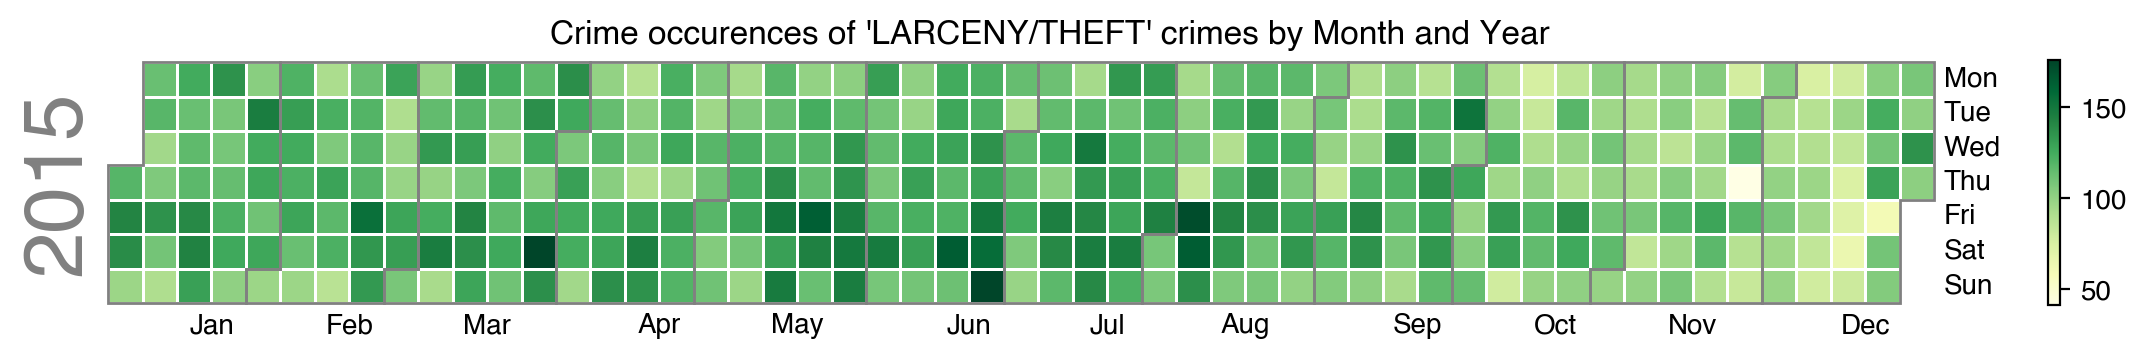

In [16]:
cal_data = focus_data[(focus_data["Category"] == "LARCENY/THEFT") & (focus_data["Date"].dt.year == 2015)]
cal_data["Date"] = pd.to_datetime(cal_data["Date"], format="%m/%d/%Y")
cal_counts = cal_data["Date"].value_counts()

fig = calplot.calplot(cal_counts, cmap='YlGn', suptitle = f"Crime occurences of 'LARCENY/THEFT' crimes by Month and Year")

On the calendar plot above we can see that larceny/theft happens often throughout the whole year. However when we get towards Winter/Christmas season then the theft is considerably less. People may be in good spirits during the holiday season and therefore criminals take a break.

And finally we will do the final subexercise of this subassignment:

- Finally, choose a different crime type and create a polar plot of its 24hour cycle (Week 2, Part 4). Again, don't forget to comment as you would in a figure text.


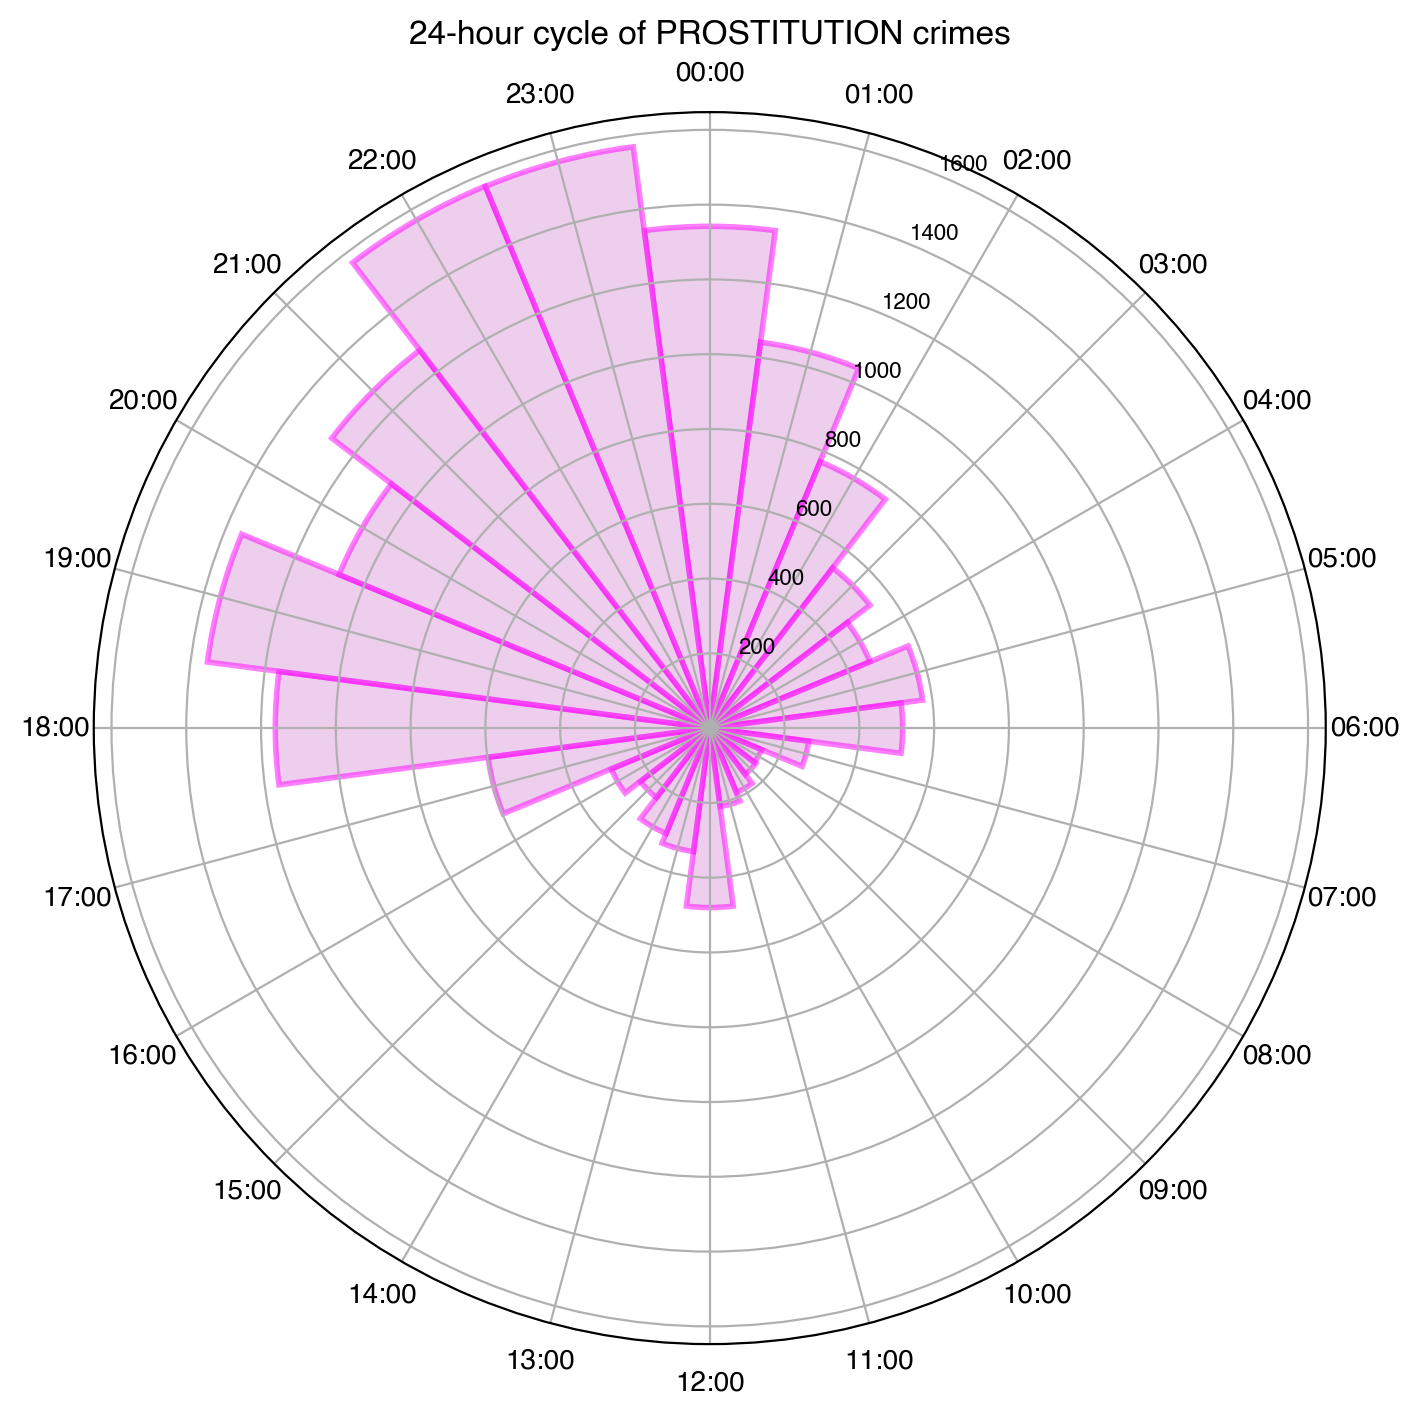

In [17]:
prostitution_data = focus_data[focus_data["Category"] == "PROSTITUTION"]

prostitution_data["HourOfDay"] = pd.to_datetime(prostitution_data["Time"], format="%H:%M").dt.hour

hourly_counts = prostitution_data["HourOfDay"].value_counts().sort_index()

fig, ax = plt.subplots(subplot_kw=dict(projection='polar'), figsize=(8,8))

bars = ax.bar(hourly_counts.index * 2 * np.pi / 24, hourly_counts.values, width=2 * np.pi / 24, alpha=0.5, color='plum', edgecolor='fuchsia', linewidth=2)

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

ax.set_xticks(np.linspace(0, 2 * np.pi, 24, endpoint=False))
ax.set_xticklabels([f"{hour:02d}:00" for hour in range(24)])
ax.tick_params(axis='y', labelsize=8)
ax.set_title("24-hour cycle of PROSTITUTION crimes")

plt.show()

The above figure shows the 24-hour cycle of 'PROSTITUTION'. It shows that prostitution is clearly committed during the evening likely. This type of plot shows the exact same thing as a regular bar chart, however, one can better intuitively perceive the tendencies, because the chart now looks like a clock. 

<font size="4">**A1 Part 2: Dataviz questions**</font>

This part of the assigment wishes to answer some questions from Sune's lecture. We wish answer the following questions:

1. Mention 10 examples of ways we can encode data. 
2. Are all encodings created equally? Why not? Can you think of an example from the previous lectures?
3. Mention 3 encodings that are difficult for the human eye to parse. Can you find an example of a visualization online that uses one of those three?
4. Explain in your own words: What is the problem with pie-charts?


<u>ANSWER</u>

1) Examples of ways to encode: position, length, area, shape, color, angle, line weight, line ending, texture, pattern

2) No, they are not. Some encodings are good at revealing some aspects of the data, while others aren't. In the lecture, Sune talks about the major differences between pie-charts and bar-charts. Bar charts are way better than pie-charts since bar-charts are able to visualize the position and length.

3) Angle, area/size and color intensity are 3 encodings that are difficult for the human eye to parse. The pie-chart uses some of these encodings. It uses angle and area and not necessarily intensity of color. 

4) Pie-charts are problematic because it is very hard for the human eye to distinguish between angles and sizes in the circular pie. In the example that Sune showed in the lecture, it was very hard to distinguish, which block was larger than what. But as soon as the same chart was shown as a bar-chart instead, then it became much clearer, since we now can see the height of each bar clearly.

<font size="4">**A1 Part 3: Visualizing geodata using Plotly**</font>

In this subassignment we wish to create a choropleth map of San Francisco, showing where it's safest to leave your car on Sundays, following the instructions from Week 3. We first wish to answer the following question:

- Based on your map and analysis, where should you park the car for it to be safest on a Sunday? And where's the worst place?

We will answer this question by making a choropleth map of San Fransisco with 'VEHICLE THEFT' crimes committed on Sundays.


In [18]:
with urlopen('https://raw.githubusercontent.com/suneman/socialdata2022/main/files/sfpd.geojson') as response:
    dd = json.load(response)
        
sunday_crimes = data[(data["Category"] == "VEHICLE THEFT") & (data['DayOfWeek'] == 'Sunday')].groupby('PdDistrict')['PdDistrict'].count()
sunday_crimes_dict = dict(sunday_crimes)
sundaycrimes = pd.DataFrame(sunday_crimes_dict.items(), columns=['DISTRICT', 'value'])

fig = px.choropleth_mapbox(sundaycrimes, geojson=dd, locations='DISTRICT', color='value',
                           color_continuous_scale="Viridis",
                           range_color=(min(sundaycrimes.value), max(sundaycrimes.value+200)),
                           mapbox_style="carto-positron",
                           zoom=10.7, center = {"lat": 37.77, "lon": -122.4},
                           opacity=0.5,
                           labels={'value':'Number of vehicle thefts'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

We can clearly see on the choropleth map that **the safest place to park your car is in Tenderloin.** The number of crimes is at minimum here at 353 crimes. **The worst place to park your car is in Ingleside.** The number of crimes in this district is at maximum, which is around 2825. 

Now we wish to answer the following questions:

- Using visualizatios can help us uncover powerful data-patterns. However, when designing visualizations, we need to be aware of several illusions that can lead viewers to misinterpret the data we are showing (i.e. perceptual errors):
    - Try to change the range of data-values in the plot above. Is there a way to make the difference between district less evident?
    - Why do you think perceptual errors are a problem? Try to think of a few examples.
    
We will start by changing the data range values and see what happens.

In [19]:
fig = px.choropleth_mapbox(sundaycrimes, geojson=dd, locations='DISTRICT', color='value',
                           color_continuous_scale="Viridis",
                           range_color=(0, 10000),
                           mapbox_style="carto-positron",
                           zoom=10.7, center = {"lat": 37.77, "lon": -122.4},
                           opacity=0.5,
                           labels={'value':'Number of vehicle thefts'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

The answer to the first question is yes. There is a way to change the data-values in the plot to make the difference between districts less distinct. And you can do this by setting the minimum and maximum range color on the choropleth map. Now we've set range from 0 to 10,000. Now it is harder to distinguish between the colors on the map.

Perceptual errors are a problem because, although the information we receive is correct, if we perceive badly, it can mislead us. For example:
- The map above plots the sum of vechicle thefts that happened on Sunday from 2003 to 2017. This can lead to perception errors due to the Simpson's Paradox, where there's a chance that behind all this grouped data we could visualize more insightful patterns if we divided this data into subgroups.
- Misleading axes like in the example above can also make us think at first glance that Ingleside has much more crimes compared to the other districts. However, if we look at the number of crimes of Mission or Bayview the difference is not so extreme. So adjusting the range of values is worth taking into consideration.

<font size="4">**A1 Part 4: Errors in the data**</font>

In this subassigment we wish to answer some questions in regarding errors in the data. We wish to answer the following questions:

1. In each of the 3 examples we listed during Week 4, describe in your own words how the data-errors I call attention to above can bias the binned versions of the data.

2. Also, briefly mention how not noticing these errors can result in misconceptions about the underlying patterns of what's going on in San Francisco (and our modeling).

3. Find your own example of human noise in the data and visualize it.



<u>ANSWER</u>

1) 
- In the first instance, prostitution activity showed a surprising weekly peak on Thursdays. Nevertheless, this peak might not represent actual criminal activity if there are data issues in the timestamps, such as rounding or bias towards particular hours. Binning the data to produce a histogram or another type of representation may increase this bias by removing any imperfections and emphasizing the peak.
- In the second case, we observed that crimes were more likely to be reported on the hour or at quarter past, and less frequently in between. Again, by binning the data, this effect could be increased. This bias towards specific times could lead to bins that do not adequately reflect the frequency of criminal behavior.
- The Hall of Justice on the 800 block of Bryant Street was noted as a hotspot for sex crimes in the third example. Unfortunately, this hotspot might not accurately represent actual criminal activity but represent where the crime was processed. Binning the data by location may compound this bias by causing a concentration of crimes in one place that may not be representative of the actual situation.

2) 

If these mistakes are not caught, inaccurate conclusions and flawed models regarding the patterns of criminal behavior or geographical patterns may result. For example, telling the police wrong peak hours or hotspots.

3) 

The data set of crimes in San Fransisco have some errors in regarding the position of some entries in the data set resulting in making it think crimes are happening in the middle of nowhere. A plot below of the world map shows that some crimes have been mislabeled in regarding the latitude and longitude resulting in inaccurate positioning. We also decided to investigate the significance of this, which showed a total of 141 misplaced crimes. This may be insignificant as this is only 141 out of 2,000,000+ crimes resulting in a very small error in the data.

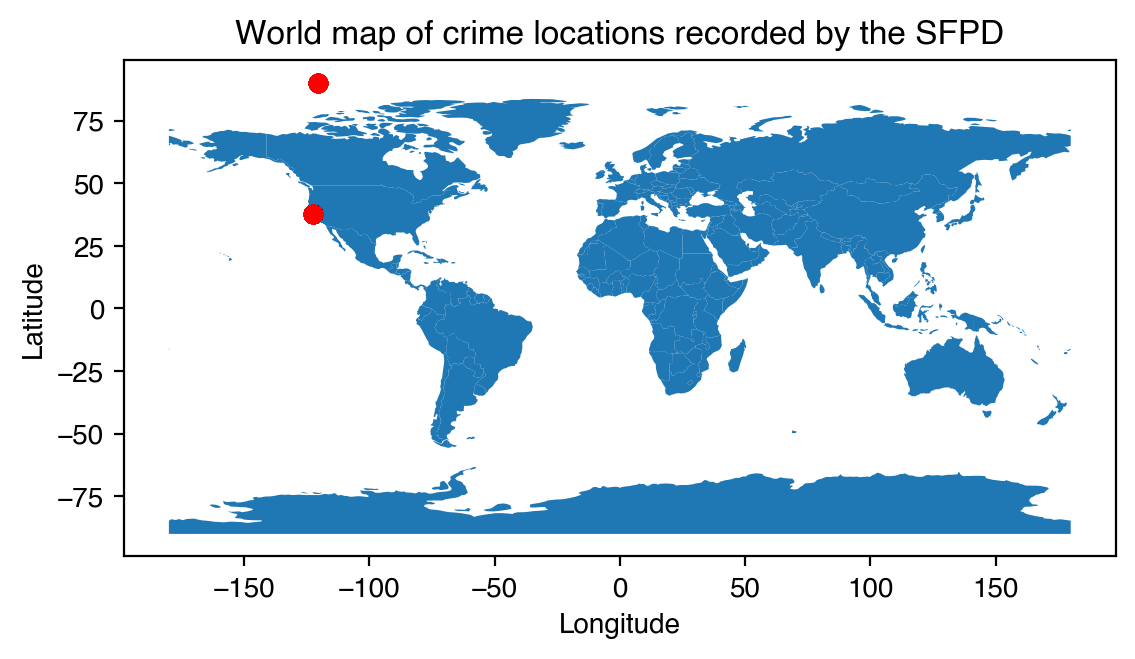

In [20]:
geometry = [Point(xy) for xy in zip(data['X'], data['Y'])]
gdf = GeoDataFrame(data, geometry=geometry)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(), marker='o', color='red')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("World map of crime locations recorded by the SFPD")
plt.show()